In [2]:
from bokeh.plotting import output_notebook, figure, show,ColumnDataSource
from bokeh.models import HoverTool, tools
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

from bokeh.models.ranges import Range1d

import aplpy

output_notebook()

from bokeh.io import export_svgs



Loading BokehJS ...

In [3]:
radeg = 265.1775731
decdeg = -53.6743252

f275 = [ ]
f336 = [ ]
f606 = [ ]
f814 = []

ra = []
radeglist = []
member = [ ]

dec = []
decdeglist = []

color = []
size=[]
closestarsindex = []
ind = []
name = []


cat = 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6397_multi_v1_catalog-meth3.txt'
with open(cat,'r') as file:
    for index, line in enumerate(file):
    #for line in file:
        line = line.strip()
        if not line:  # line is blank
            continue
        if line.startswith("#"):  # comment line
            continue
        b = line.split()
        #if float(b[2]) != -99.9999 and float(b[8]) != -99.9999 and float(b[32]) > 90.:
        if float(b[2]) != -99.9999 and float(b[8]) != -99.9999:

            ind.append(index+1)
            name.append(b[35].strip('R'))

            f275.append(float(b[2]))
            f336.append(float(b[8]))
            f606.append(float(b[20]))
            f814.append(float(b[26]))
            membertemp = float(b[32])
            member.append(membertemp)

            c1 = SkyCoord(float(b[33])*u.deg, float(b[34])*u.deg, frame='fk5')
            rahmsstr = c1.ra.to_string(u.hour,sep=':')
            decdmsstr = c1.dec.to_string(u.degree, alwayssign=True,sep=':')
            ra.append(rahmsstr)
            radeglist.append(c1.ra.deg)
            decdeglist.append(c1.dec.deg)

            dec.append(decdmsstr)
            #Center MUSe and separation
            #265.1734892, -53.6711580
            c2 = SkyCoord(radeg*u.deg, decdeg*u.deg, frame='fk5')
            sep = c1.separation(c2)

            if sep.deg < 0.0002824:
                closestarsindex.append(index)
                color.append('red')
                size.append(6)
            else:
                color.append('black')
                size.append(2)

            
indexwherered = np.where(np.array(color)=='red')[0]


In [8]:
#indexwherered = np.where(np.array(color)=='red')[0]
color = np.array(color)
color[indexwherered] = 'black'
indexwherered2 = indexwherered[0:1]
#color[indexwherered2[1]] = 'black'
color[indexwherered2] = 'red'
size = np.array(size)
#size[indexwherered2[1]] = '1'
size[indexwherered2] = '6'

In [9]:
p = figure(plot_width=700, plot_height=800,toolbar_location=None)

# change just some things about the x-axes
p.xaxis.axis_label = "F275W-F336W"
#p.xaxis.axis_label = "F606W-F814W"

p.xaxis.axis_label_text_font_size = '35px'
p.yaxis.axis_label_text_font_size = '35px'

p.xaxis.major_label_text_font_size = '20px'
p.yaxis.major_label_text_font_size = '20px'


# change just some things about the y-axes
p.yaxis.axis_label = "F275W"
#p.yaxis.axis_label = "F606"



f275 = np.array(f275)
f336 = np.array(f336)

f606 = np.array(f606)
f814 = np.array(f814)

xval = f275-f336
#xval = f606-f814


yval = f275
#yval = f606



#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ("File index", "@name"),
            ('(ra,dec)', '(@i,@dec)')
        ]
    )

        
p.add_tools(hover2)

source = ColumnDataSource(data=dict(
    x=xval,
    y=yval,
    ra=ra,
    dec=dec,
    color=color,
    ind = ind,
    size=size,
    i=f814,
    name=name
))


# add a circle renderer with a size, color, and alpha
p.circle('x','y', color='color',size='size',source=source)




#p = Scatter(data, x=xval, y=yval, title=title, xlabel=xlabel, ylabel=ylabel)
xmax = 4#xval.max()
xmin = -2#xval.min()
ymax = yval.min()
ymin = 24#yval.max()
p.x_range = Range1d(xmin, xmax)
p.y_range = Range1d(ymin, ymax)
p.output_backend = "webgl"
show(p)



#p.output_backend = "svg"
p.background_fill_color = None
p.border_fill_color  = None

#and Plot.border_fill_color 
#export_svgs(p, filename="cmd.svg")
#export_png(p, filename="plot.png")

In [10]:
f814[768]

15.9534

In [11]:
1.6*0.16

0.256

In [12]:
m2=0.256*co.M_sun.cgs
m2

NameError: name 'co' is not defined

In [ ]:
period = 1.96 *u.day
#period = 4 *u.day

period.cgs

In [ ]:
rad=2./(3**(4./3.))*(m2)**(1/3.)*(period.cgs**2*co.G.cgs/(4*np.pi**2))**(1/3.)
rad

In [47]:
rad.cgs/co.R_sun.cgs

<Quantity 1.93444691>

In [39]:
co.R

TypeError: can't multiply sequence by non-int of type 'float'

In [19]:
f814[768]

15.9534

In [20]:
f606[581]

16.2573

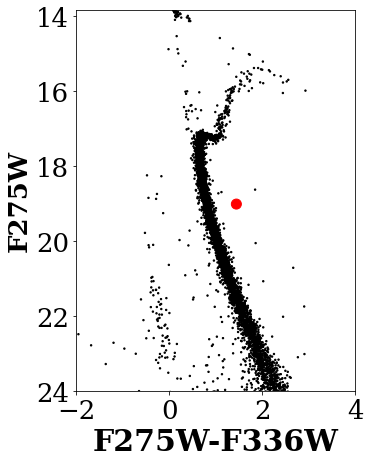

In [21]:


#indexwherered = np.where(np.array(color)=='red')[0]
color = np.array(color)
color[indexwherered] = 'black'
indexwherered2 = indexwherered[0:1]
#color[indexwherered2[1]] = 'black'
color[indexwherered2] = 'red'
size = np.array(size)
#size[indexwherered2[1]] = '1'
size[indexwherered2] = '100'


plt.rc('font', family='serif')
plt.rc('xtick', labelsize='xx-large')
plt.rc('ytick', labelsize='xx-large')


fig = plt.figure(figsize=(5, 7))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('F275W-F336W',fontsize=30,fontweight='bold')
ax.set_ylabel('F275W',fontsize=26,fontweight='bold')
#ax.errorbar(time, mag, yerr=dmag,fmt='.',color='k',capsize=3)
ax.tick_params(axis='both', which='major', labelsize=26)

plt.scatter(xval, yval,color=color,s=size)

xmax = 4#xval.max()
xmin = -2#xval.min()
ymax = yval.min()
ymin = 24#yval.max()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


#plt.gcf().autofmt_xdate()
plt.show()
#save iamge
#fig.savefig('lcdate.svg', format='svg',bbox_inches = "tight")

fig.savefig('cmd.png', format='png',bbox_inches="tight", transparent=True,dpi=700)


In [7]:
from bokeh.resources import CDN
from bokeh.plotting import figure
from bokeh.embed import autoload_static

js, tag = autoload_static(p, CDN, "images/cmd.js")

In [8]:
name2 = 'cmd'
with open(name+'.js','w') as jsfile:
    jsfile.write(js)
with open(name+'.html','w') as htmlfile:
    htmlfile.write(tag)


TypeError: can only concatenate list (not "str") to list

In [9]:
tag

'\n<script src="images/cmd.js" id="3fd92e4c-0896-4f6e-88a8-74aa4af2df3a"></script>'

In [10]:
from IPython.display import FileLink, FileLinks
FileLinks('.') #lists all downloadable files on server

./
  hlsp_acsggct_hst_acs-wfc_ngc6397_r.rdviq.cal.adj.zpt
  pampleAll.csv
  CMSNGC6397.ipynb
  hlsp_hugs_hst_wfc3-uvis_ngc6397_f275w_v1_stack-0752s.fits
  closestarsU19.reg
  closestars.reg
  closestarsU18.reg
  closestarshugsandersonids.reg
  matchcatalgos.ipynb
  aa.reg
  hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6397_multi_v1_catalog-meth3.txt
  cmd.js
  Cohn.reg
  cmd.png
  closestarsAll.reg
  plot.png
  SmallerCatalogMUSE.ipynb
  cmd.svg
  pample.csv
  closestarsOldId.reg
  closestarsU12.reg
  cmd.html
./.ipynb_checkpoints/
  plot-checkpoint.png
  closestarsAll-checkpoint.reg
  CMSNGC6397-checkpoint.ipynb
  SmallerCatalogMUSE-checkpoint.ipynb
  cmd-checkpoint.js
  cmd-checkpoint.svg
  pampleAll-checkpoint.csv
  closestarsOldId-checkpoint.reg
  matchcatalgos-checkpoint.ipynb
  aa-checkpoint.reg
  hlsp_acsggct_hst_acs-wfc_ngc6397_r.rdviq.cal.adj-checkpoint.zpt
  closestarshugsandersonids-checkpoint.reg
  pample-checkpoint.csv
  cmd-checkpoint.html
  closestarsU19-checkpoint.reg
  hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6397_multi_v1_catalog-meth3-checkpoint.txt

In [11]:
! sed '50649q;d'  hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6656_multi_v1_catalog-meth1.txt

sed: hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6656_multi_v1_catalog-meth1.txt: No such file or directory


In [12]:
color2=np.array(color)
closestars = np.where(color2 == 'red')[0]
ra[0]
closestars

array([581])

# Make Region

In [13]:
#region to plot
findreg = 'closestarsU18.reg'
listregs = []

with open(findreg,'w') as fileone:
    for index in closestars:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='fk5;circle({0},{1},0.1") # color=green text={2} \n'.format(ra[index],dec[index],'{CMDID'+str(name[index])+"}")
            listregs.append(text)
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)

In [14]:
closestars

array([581])

# Make catalog for Pamplemuse

In [8]:
header = "id,ra,dec,f606w\n"

#region to plot
csv = 'pampleAll.csv'
with open(csv,'w') as fileone:
    fileone.write(header)

#region to plot
#csv = 'pample.csv'
with open(csv,'a') as fileone:
    for index in closestars:
            #text='circle({0},{1},.1") # color=blue text={2} \n'.format(ra[index],dec[index],'{'+str(ind[index])+"}")
            text='{},{},{},{} \n'.format(str(name[index]),radeglist[index],decdeglist[index],f606[index])
            #text='fk5; circle({0},{1},.1") # color=red text=\{{2}\}\n'.format(ra[index],dec[index],index)
            fileone.write(text)
            #print(text)

In [9]:
! wc pample.csv

 1185  1185 42627 pample.csv


# Make figure

INFO: Auto-setting vmin to -4.330e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.782e+02 [aplpy.core]


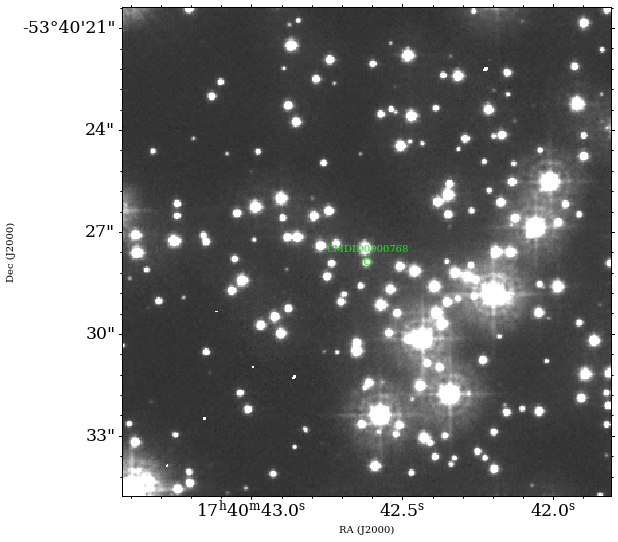

In [20]:
fig = aplpy.FITSFigure('hlsp_hugs_hst_wfc3-uvis_ngc6397_f275w_v1_stack-0752s.fits')
fig.show_grayscale()
fig.recenter(radeg, decdeg, width=0.004, height=0.004)  # degree
fig.show_regions('closestarsU18.reg')

# 